In [76]:
import numpy as np
import scipy.integrate as intg
from matplotlib import pyplot as plt

# Rotational Motion

### Rotation of a point mass around a point

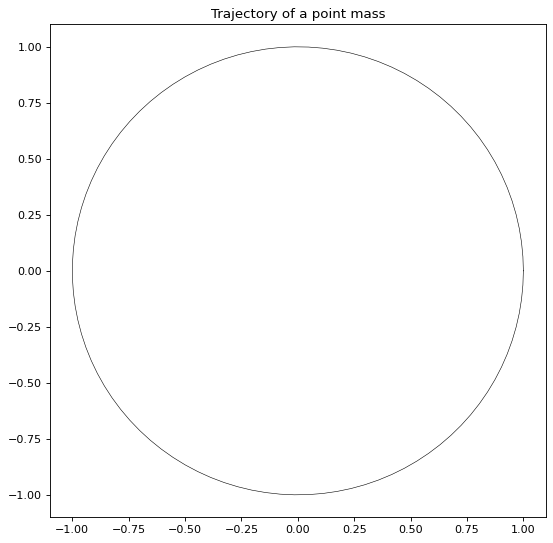

In [77]:
m=1
r=1
w=1
def plot_setup():
    plt.figure(figsize=(8,8),dpi=80)
plot_setup()
t_array=np.linspace(0,2*np.pi,100)
x_array=np.cos(w*t_array)
y_array=np.sin(w*t_array)
plt.plot(x_array,y_array,color="black",linewidth=0.5)
plt.title("Trajectory of a point mass")
plt.show()


Text(0.5, 0.92, 'Trajectory over time')

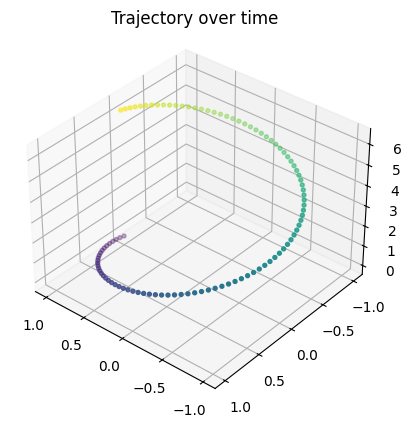

In [78]:
plt3d=plt.axes(projection="3d")
plt3d.scatter3D(x_array,y_array,t_array,s=8,c=t_array)
plt3d.view_init(azim=130,elev=35) # type: ignore
plt.title("Trajectory over time")

### Calculating the energy:

$$K.E=\frac{1}{2 } m v ^{2} \qquad ;\qquad P=0 $$
$$K.E=\frac{1}{2} m \omega^{2}r^{2}$$

In [79]:
energy=0.5*(w*r)**2
print(f"Kinetic energy of the Point mass: {energy}")

Kinetic energy of the Point mass: 0.5


## Rotation of multiple point masses around a point:
If we assume that all point masses belongs to the same object, they have the same angular velocity $\omega$. Only the radius differs.
$$E_n=\frac{1 }{2} I_n \omega^2$$
This helps us to find the Energy of the rotating stick, cylinder, etc..
Rotating stick around one end ($I=\frac{1}{3}ms^2$)

- analytical result:

 $$E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$I = \int\mathrm{d}m\, r^2 \quad\quad\quad \text{with}\quad \mathrm{d}m = \sigma\,\mathrm{d}r \quad\quad\quad \text{and}\quad \sigma = \frac{m}{s}\quad\text{length density}$$
 
 $$I = \frac{m}{s}\int_{0}^{s}\mathrm{d}r\, r^2 $$

 $$I = \frac{1}{3}ms^2$$

In [80]:
points=1000
s=1
m=3
r_list=np.linspace(0,1,points)
# Analytical Value:
print(f"Energy: {1/6*m*(s**2)} J")

Energy: 0.5 J


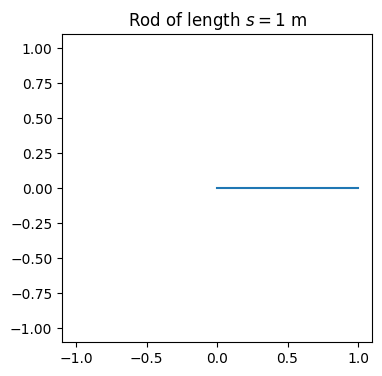

In [81]:
plt.figure(figsize=(4,4))
plt.plot(r_list,np.zeros(points))
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)
plt.title("Rod of length $s = 1\\text{ m}$")
plt.show()

In [82]:
# Numerical Value:
dm=m/(points-1)
interval=(r_list[1]-r_list[0])
energy_vals=dm/2*np.array([(interval/2+ interval*n)**2 for n in range(0,len(r_list)-2)])
total_energy=np.sum(energy_vals)
print(total_energy)
print(f"Error percentage: {abs(energy-total_energy)/energy*100 :.5}%")

0.49849987587650174
Error percentage: 0.30002%


# Rotation of sphere:
## Analytical Result
 $$ E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$ I = \int\mathrm{d}m\, r^2 \quad\quad\quad \text{with}\quad \mathrm{d}m = \rho\,\mathrm{d}V \quad\quad\quad \text{and}\quad \rho=\frac{m}{V} \quad\text{(volume) density}$$
 
 $$ I = \frac{m}{V}\int_V\mathrm{d}V\, r^2 $$
 
 Using cylindrical coordinates
 
 $$ I = \frac{m}{V}\int_{z=-R}^{R}\int_{r=0}^{\tilde{R}(z)}\int_{\varphi=0}^{2\pi}\,r\,\mathrm{d}r\mathrm{d}z\mathrm{d}\varphi\, r^2 $$
 
 Calculate polar-angle integral and use $$ \tilde{R}(z) = \sqrt{R^2-z^2} $$
 
  $$ I = \frac{m}{V} \left(\int_{\varphi=0}^{2\pi}\,\mathrm{d}\varphi\right)\, \int_{z=-R}^{R}\int_{r=0}^{\tilde{R}(z)} r^3 \,\mathrm{d}r\mathrm{d}z$$
  
  $$ I = \frac{m}{V} 2\pi\,\int_{z=-R}^{R} \left[\frac{1}{4}r^4\right]_{r=0}^{\sqrt{R^2-z^2}} \,\mathrm{d}z $$
  
  $$ I = \frac{m}{V} 2\pi\,\int_{z=-R}^{R} \frac{1}{4}\left(R^2-z^2\right)^2 \,\mathrm{d}z $$
  
  $$ I = \frac{m}{V} \frac{\pi}{2}\,\int_{z=-R}^{R} \left(R^4-2R^2z^2+z^4\right) \,\mathrm{d}z $$
  
  $$ I = \frac{m}{V} \frac{\pi}{2}\,\left[R^4z-\frac{2}{3}R^2z^3+\frac{1}{5}z^5\right]_{z=-R}^{R} $$
  
  $$ I = \frac{m}{V} \frac{\pi}{2}\,2\left(R^5-\frac{2}{3}R^5+\frac{1}{5}R^5\right) $$
  
  $$ I = \frac{m}{V} \pi\,\frac{8}{15}R^5 $$
  
 use volume of the sphere $$ V = \frac{4}{3}\pi R^3 $$
 
 $$ I = m \frac{\frac{8}{15}\pi R^5}{\frac{4}{3}\pi R^3} $$
 
 $$ I = \frac{2}{5}mR^2$$

In [83]:
r= 1
m= 1
w=1
alt_energy=1/2*(2/5 *m*(r**2))*(w**2)
print(alt_energy)

0.2


Kinetic Energy in Numerical computation= 1.996e-01
Theoretical Kinetic energy: 2.000e-01
Error percentage: 0.22%


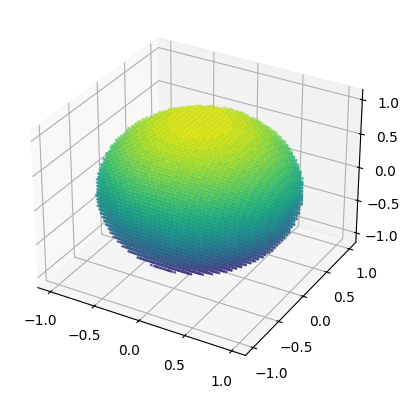

In [101]:
num_points=20
total_array=np.array([[i,j,k]
                      for i in range(-1*num_points,2*num_points)
                      for j in range(-1*num_points,2*num_points)
                      for k in range(-1*num_points,2*num_points)
                      if ((i**2+j**2+k**2)/num_points**2)<=1])/num_points
ax_plot=plt.axes(projection = "3d")
total_array=np.transpose(total_array)
ax_plot.scatter3D(total_array[0],total_array[1],total_array[2],s=1,c=total_array[2])
count=np.shape(total_array)[1]
contribution=sum([total_array[0][i]**2 +total_array[1][i]**2 for i in range(count)])
inertia=m/count*contribution
energy=1/2*inertia*w**2
print(f"Kinetic Energy in Numerical computation= {energy :.3e}\nTheoretical Kinetic energy: {alt_energy :.3e}")
error=(abs(energy-alt_energy)/alt_energy*100)
print(f"Error percentage: {error :.2}%")
plt.show()